# C3M1: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply Binomial regression methods to real data.
2. Understand how to analyze and interpret binomial regression models.
3. Flex our math skills by determining whether certain distributions are members of the exponential family.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load required libraries
library(tidyverse)
library(dplyr)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




## Problem 1: Binomial (Logistic) Regression

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study of 768 adult female Pima Indians living near Phoenix, AZ. The purpose of the study was to investigate the factors related to diabetes. 

*Before we analyze these data, we should note that some have raised ethical issues with its collection and popularity in the statistics and data science community. We should think seriously about these concerns. For example, Maya Iskandarani wrote a brief [piece](https://researchblog.duke.edu/2016/10/24/diabetes-and-privacy-meet-big-data/) on consent and privacy concerns raised by this dataset. After you familarize yourself with the data, we'll then turn to these ethical concerns.*


First, we'll use these data to get some practice with GLM and Logistic regression.

In [2]:
# Load the data
pima = read.csv("pima.txt", sep="\t")
# Here's a description of the data: https://rdrr.io/cran/faraway/man/pima.html
head(pima)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


### 1. (a) Data Cleaning? What about Data Scrubbing? Data Sterilizing?

This is a real data set, which means that there's likely going to be gaps and missing values in the data. Before doing any modeling, we should inspect the data and clean it if necesary.

Perform simple graphical and numerical summaries of the data. Pay attention for missing or nonsensical values. Can you find any obvious irregularities? If so, take appropriate steps to correct these problems. In the markdown cell, specify what cleaning you did and why you did it.

Finally, split your data into training and test sets. Let the training set contain $80\%$ of the rows and the test set contain the remaining $20\%$.

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

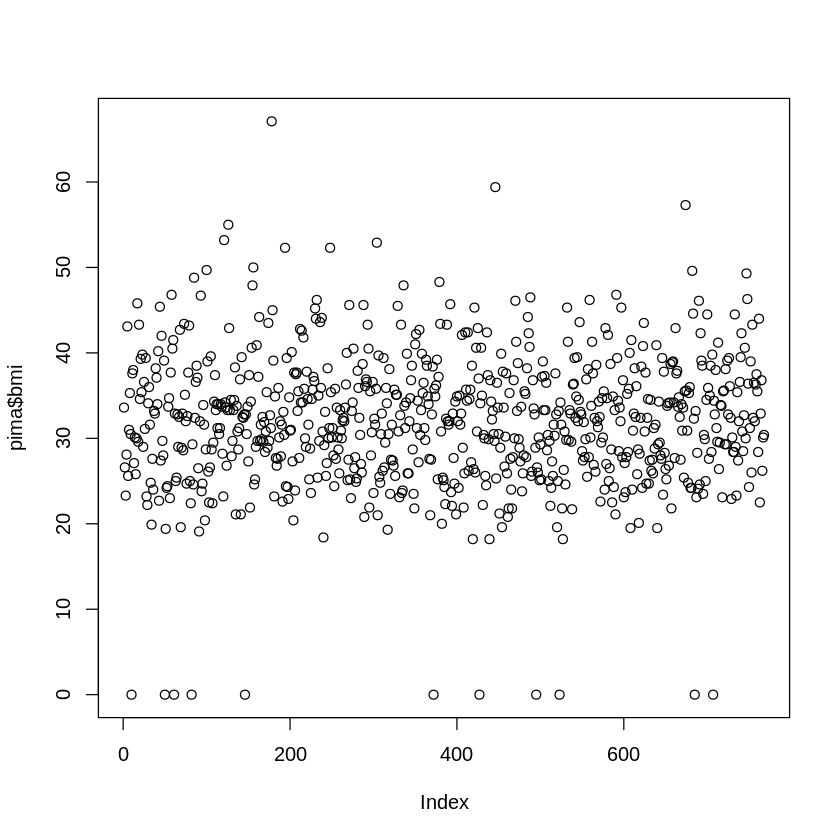

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 56.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.:21.00  
 Median : 2.000   Median :119.0   Median : 70.00   Median :29.00  
 Mean   : 3.301   Mean   :122.6   Mean   : 70.66   Mean   :29.15  
 3rd Qu.: 5.000   3rd Qu.:143.0   3rd Qu.: 78.00   3rd Qu.:37.00  
 Max.   :17.000   Max.   :198.0   Max.   :110.00   Max.   :63.00  
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0850   Min.   :21.00  
 1st Qu.: 76.75   1st Qu.:28.40   1st Qu.:0.2697   1st Qu.:23.00  
 Median :125.50   Median :33.20   Median :0.4495   Median :27.00  
 Mean   :156.06   Mean   :33.09   Mean   :0.5230   Mean   :30.86  
 3rd Qu.:190.00   3rd Qu.:37.10   3rd Qu.:0.6870   3rd Qu.:36.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median 

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 56.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.:21.00  
 Median : 2.000   Median :118.0   Median : 70.00   Median :29.00  
 Mean   : 3.288   Mean   :121.4   Mean   : 70.32   Mean   :28.86  
 3rd Qu.: 5.000   3rd Qu.:139.0   3rd Qu.: 78.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :198.0   Max.   :110.00   Max.   :63.00  
    insulin         bmi           diabetes           age            test       
 Min.   : 14   Min.   :18.20   Min.   :0.0850   Min.   :21.0   Min.   :0.0000  
 1st Qu.: 76   1st Qu.:28.30   1st Qu.:0.2670   1st Qu.:23.0   1st Qu.:0.0000  
 Median :125   Median :33.20   Median :0.4540   Median :26.0   Median :0.0000  
 Mean   :154   Mean   :32.91   Mean   :0.5199   Mean   :30.7   Mean   :0.3195  
 3rd Qu.:190   3rd Qu.:36.90   3rd Qu.:0.6820   3rd Qu.:36.0   3rd Qu.:1.0000  
 Max.   :846   Max.   :67.10   Max.   :2.4200   Max

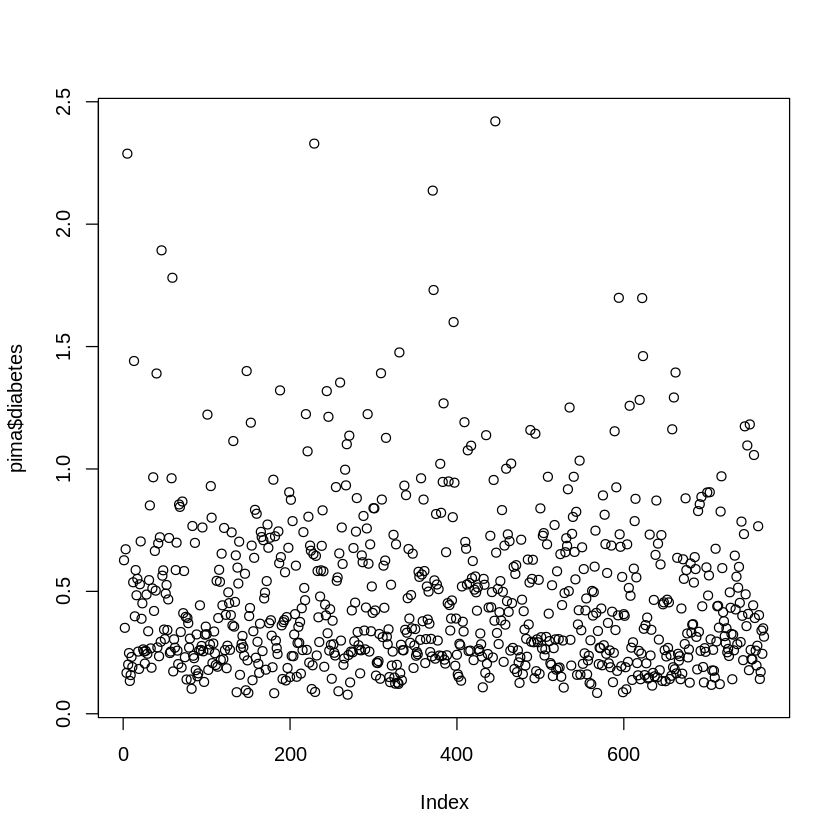

In [3]:
# Your Code Here
summary(pima)
plot(pima$bmi)
plot(pima$diabetes)


pima.clean = filter(pima, glucose>0, diastolic>0, triceps>0, insulin>0, bmi>0)
summary(pima.clean)



set.seed(1500)
n = floor(0.8 * nrow(pima.clean))
index = sample(seq_len(nrow(pima.clean)), size = n)
train = pima.clean[index, ]
test = pima.clean[-index, ]
summary(train)



<span style="color:orange"> After looking at the data, and checking the meaning of each variable at the source url, I decided to remove the rows with value 0 for the columns glucose, diastolic, triceps, insulin, and bmi. For all of these columns, a value of zero does not make sense physically or biologically, so such rows will not be useful for data analysis. </span>

### 1. (b) Initial GLM modelling


Our data is clean and we're ready to fit! What kind of model should we use to fit these data? Notice that the `test` variable is either $0$ or $1$, for whether the individual tested positive for diabetes. Because `test` is binary, we should use logistic regression (which is a kind of binomial regression).

Fit a model with `test` as the response and all the other variables as predictors. Can you tell whether this model fits the data?


Call:
glm(formula = test ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0028  -0.6335  -0.3687   0.6134   2.4989  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.4065813  1.3319279  -7.062 1.64e-12 ***
pregnant     0.1352940  0.0604732   2.237  0.02527 *  
glucose      0.0366211  0.0067046   5.462 4.71e-08 ***
diastolic   -0.0063813  0.0137983  -0.462  0.64374    
triceps      0.0154365  0.0193599   0.797  0.42525    
insulin     -0.0002447  0.0014873  -0.165  0.86929    
bmi          0.0699647  0.0318524   2.197  0.02805 *  
diabetes     1.3375506  0.4931165   2.712  0.00668 ** 
age          0.0158827  0.0199894   0.795  0.42687    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 392.18  on 312  degrees of freedom
Residual deviance: 270.78  on 304  degrees of freedom
AIC: 288.78

Number o

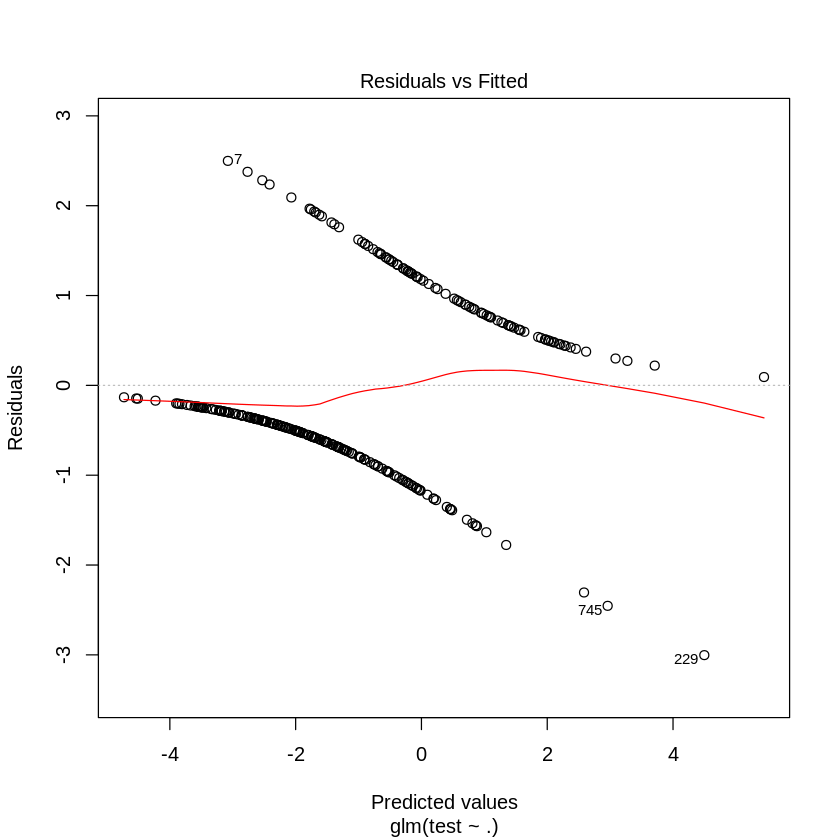

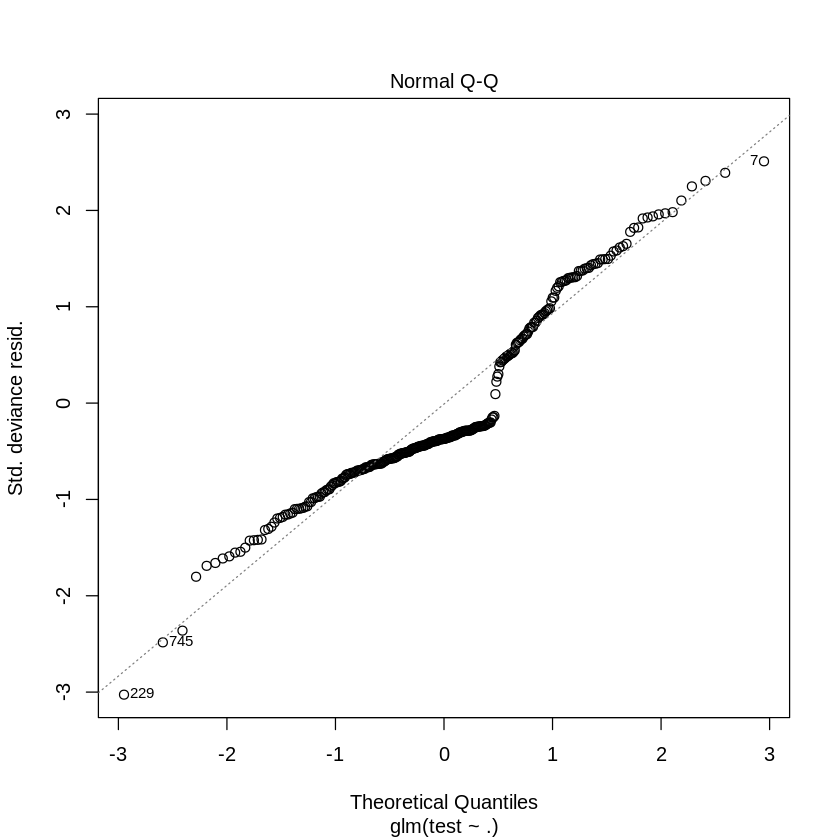

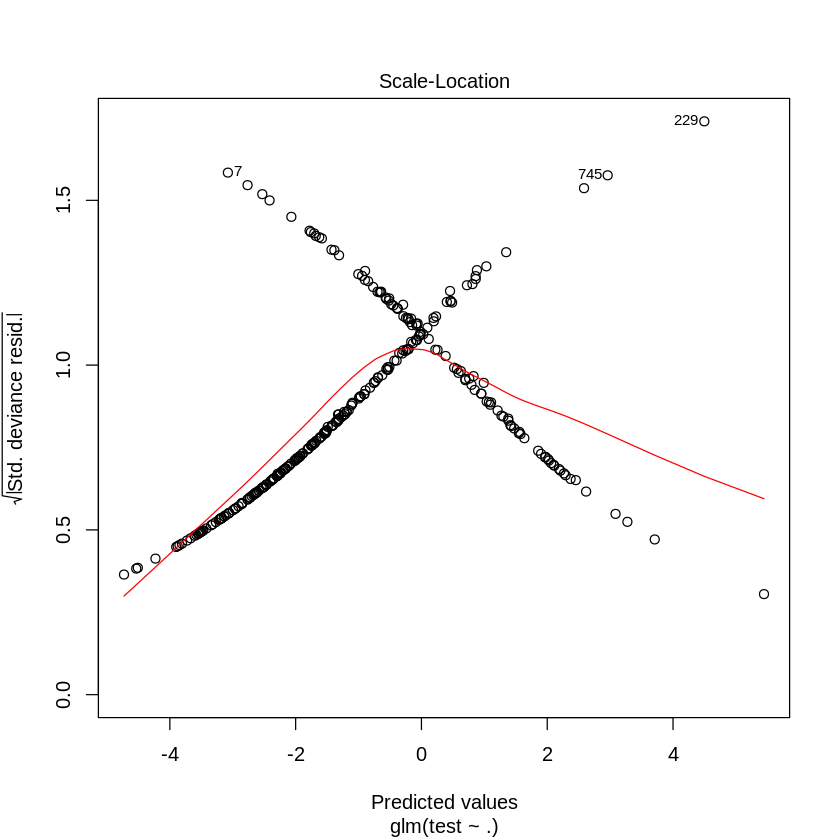

[1] 0.9150329

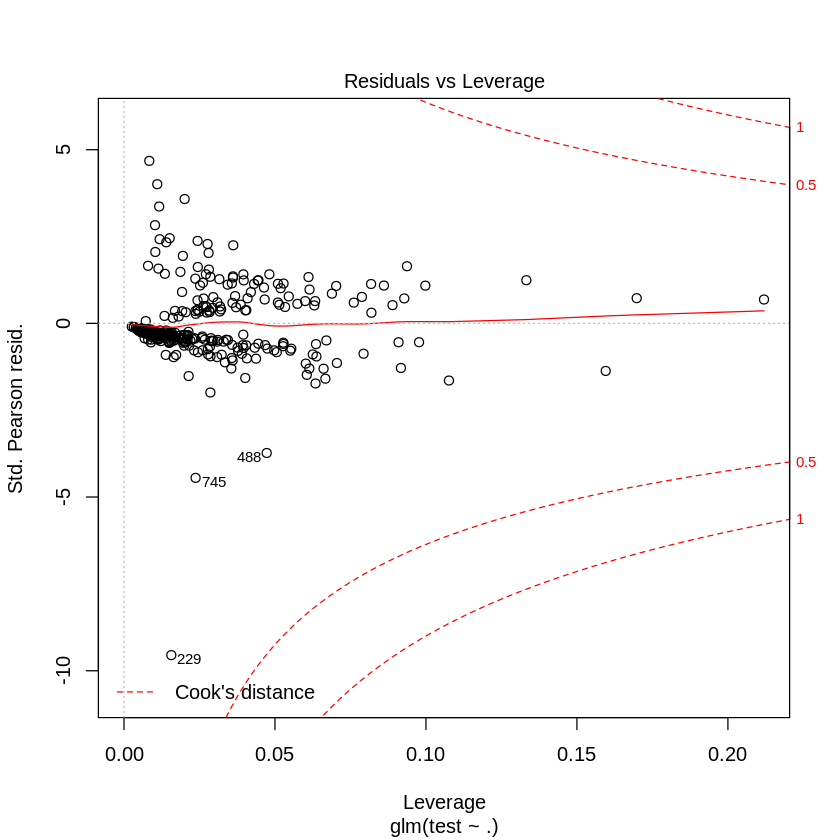

In [4]:
# Your Code Here

glmod.pima = glm(test ~ ., data = train, family="binomial")
summary(glmod.pima)
plot(glmod.pima)
pchisq(deviance(glmod.pima), df.residual(glmod.pima), lower = FALSE)


<span style="color:orange"> At first look, the summary plots do not look like anything I have seen before. I am not able to interpet them, but form the notes, I believe I should try a Chi-squared test. Above, I run a chi-squared test to test the null hypothesis that the model fits well versus the alternate hypothesis that the model is insufficient. We can see that the p-value is large, so we cannot reject the null hypothesis.  Thus, we may say that the model fits well. </span>

### 1. (c) Remember Bayes

A quick analytical interlude.

Is diastolic blood pressure significant in the regression model? Do women who test positive have higher diastolic blood pressures? Explain the distinction between the two questions and discuss why the answers are only apparently contradictory.

In [5]:
# Your Code Here
summary(glmod.pima)


Call:
glm(formula = test ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0028  -0.6335  -0.3687   0.6134   2.4989  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.4065813  1.3319279  -7.062 1.64e-12 ***
pregnant     0.1352940  0.0604732   2.237  0.02527 *  
glucose      0.0366211  0.0067046   5.462 4.71e-08 ***
diastolic   -0.0063813  0.0137983  -0.462  0.64374    
triceps      0.0154365  0.0193599   0.797  0.42525    
insulin     -0.0002447  0.0014873  -0.165  0.86929    
bmi          0.0699647  0.0318524   2.197  0.02805 *  
diabetes     1.3375506  0.4931165   2.712  0.00668 ** 
age          0.0158827  0.0199894   0.795  0.42687    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 392.18  on 312  degrees of freedom
Residual deviance: 270.78  on 304  degrees of freedom
AIC: 288.78

Number o

<span style="color:orange"> 
According to the t-test from the summary of the model, the diastolic blood pressure is not significant in the regression model. Women who test positive do have higher blood pressure, but this is not contradictory because their may be unexplained effects, but overall the blood pressure is not significant. Additionally, the conditional probabilities associated with each question are not the same when we consider Baye's theorem.


</span>

### 1. (d) GLM Interpretation

We've seen so many regression summaries up to this point, how is this one different from all the others? Well, to really understand any model, it can be helpful to loop back and plug the fitted results back into the model's mathematical form.

Explicity write out the equation for the binomial regression model that you fit in (b). Then, in words, explain how a $1$ unit change of `glucose` affects `test`, assuming all other predictors are held constant.

In [6]:
# Your Code Here
summary(glmod.pima)


Call:
glm(formula = test ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0028  -0.6335  -0.3687   0.6134   2.4989  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.4065813  1.3319279  -7.062 1.64e-12 ***
pregnant     0.1352940  0.0604732   2.237  0.02527 *  
glucose      0.0366211  0.0067046   5.462 4.71e-08 ***
diastolic   -0.0063813  0.0137983  -0.462  0.64374    
triceps      0.0154365  0.0193599   0.797  0.42525    
insulin     -0.0002447  0.0014873  -0.165  0.86929    
bmi          0.0699647  0.0318524   2.197  0.02805 *  
diabetes     1.3375506  0.4931165   2.712  0.00668 ** 
age          0.0158827  0.0199894   0.795  0.42687    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 392.18  on 312  degrees of freedom
Residual deviance: 270.78  on 304  degrees of freedom
AIC: 288.78

Number o


    
$e^{\hat{\eta}} = e^{\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2x_2+\hat{\beta}_3x_3+\hat{\beta}_4x_4+\hat{\beta}_5x_5+\hat{\beta}_6x_6+\hat{\beta}_7x_7+\hat{\beta}_8x_8+\hat{\beta}_9x_9}$

For 1 unit increase in glucose: $e^{\hat{\eta}+1} = e^{\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2(x_2+1)+\hat{\beta}_3x_3+\hat{\beta}_4x_4+\hat{\beta}_5x_5+\hat{\beta}_6x_6+\hat{\beta}_7x_7+\hat{\beta}_8x_8+\hat{\beta}_9x_9} = e^{\hat{\beta}_2}e^{\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2x_2+\hat{\beta}_3x_3+\hat{\beta}_4x_4+\hat{\beta}_5x_5+\hat{\beta}_6x_6+\hat{\beta}_7x_7+\hat{\beta}_8x_8+\hat{\beta}_9x_9} = e^{0.0382723}e^{\hat{\eta}} \approx 1.039e^{\hat{\eta}}$

<span style="color:orange"> 
We can see that there is a multiplicative effect when there is a 1 unit increase in glucose. The probability that a woman tests positive is multiplied by 1.039 with each unit increase of glucose.
</span>

### 1. (e) GLM Prediction

One of the downsides of Logistic Regression is that there isn't an easy way of evaulating the goodness of fit of the model without predicting on new data. But, if we have more data to test with, then there are many methods of evaluation to use. One of the best tools are confusion matrices, which (despite the name) are actually not that hard to understand.

A confusion matrix compares the predicted outcomes of a Logistic Regression Model (or any classification model) with the actual classifications. For binary classification, it is a $2 \times 2$ matrix where the rows are the models' predicted outcome and the columns are the actual classifications. An example is displayed below.

|  | True | False |  
| --- | --- | --- |
| 1 | 103 | 37 |  
| 0 | 55  | 64 |  

In the example, we know the following information:
* The [1,1] cell is the number of datapoints that were correctly predicted to be $1$. The value (103) is the number of True Positives (TP). 
* The [2,2] cell is the number of datapoints that were correctly predicted to be $0$. The value is the number of True Negatives (TN).
* The [1, 2] cell is the number of datapoints that were predicted to be $1$ but where actually $0$. This is the number of False Positives (FP), also called Type I error. In the context of our diabetes dataset, this would mean our model predicted that the person would have diabetes, but they actually did not.
* The [2, 1] cell is the number of datapoints that were predicted to be $0$ but where actually $1$. This is the number of False Negatives (FN), also called Type 2 error. In the context of our diabetes dataset, this would mean our model predicted that the person would not have diabetes, but they actually did have diabetes.

Use your model to predict the outcomes of the test set. Then construct a confusion matrix for these predictions and display the results.

In [7]:
# Your Code Here
glmod.pima.predict = ifelse(predict.glm(glmod.pima, type='response', test, na.rm=TRUE) >=0.5, 1, 0)

positiveTrue =  sum(as.numeric(test$test) == 1  & glmod.pima.predict == 1);
positiveFalse = sum(as.numeric(test$test) == 1  & glmod.pima.predict == 0);
negativeTrue =  sum(as.numeric(test$test) == 0  & glmod.pima.predict == 1);
negativeFalse = sum(as.numeric(test$test) == 0  & glmod.pima.predict == 0);

table = data.frame( True=c(positiveTrue,negativeTrue), False=c(positiveFalse,negativeFalse))
rownames(table) = c("positive","negative")
table

,True,False
,<int>,<int>
positive,18,12
negative,6,43


<span style="color:orange"> 
Above you can see the constructed confusion matrix using the results from the GLM and the pima data it was trained and tested on.
</span>

### 1. (f) Evaluation Statistics

Using the four values from the confusion matrix, we can construct evaulation statistics to get a numerical approximation for our model's performance. Spend some time researching accuracy, precision, recall and F score. 

Calculate these values for your model's predictions on the test set. Clearly display your results. How well do you think your model fits the data?

In [8]:
# Your Code Here
glmod.accuracy = (positiveTrue + negativeTrue)/dim(test)[1]; glmod.accuracy
glmod.precision = positiveTrue/(positiveTrue+positiveFalse); glmod.precision
glmod.recall = positiveTrue/(positiveTrue + negativeFalse); glmod.recall
glmod.Fscore = (2*positiveTrue)/(2*positiveTrue + positiveFalse + negativeFalse); glmod.Fscore

[1] 0.3037975

[1] 0.6

[1] 0.295082

[1] 0.3956044

<span style="color:orange"> 
The F-score of approximately 0.4 shows low performance of the model. This can be attributed to error or overall bad fit. Implementation may also be an issue.
</span>

### 1. (g) Understanding Evaluation Statistics

Answer the following questions in the markdown cell below.

1. Give an example scenario for when accuracy would be a misleading evaulation statistic.
2. Confusion matrices can also be used for non-binary classification problems. Describe what a confusion matrix would look like for a response with $3$ levels.
3. You'll have to take our word on the fact (or spend some time researching) that Type I error and Type II error are inversely related. That is, if a model is very good at detecting false positives, then it will be bad at detecting false negatives. In the case of our diabetes dataset, would you prefer a model that overestimates the Type 1 error or overestimates the Type II error. Justify your answer.

<span style="color:orange"> 
1) Accuracy may be a misleading evaluation statistic if the accuracy were to be great by happenstance. For instance if the model predicted true and false 50% of the time and it were fit onto coinflip data, then the accuracy would be high, but the model is not considering the data.
    
<span style="color:orange"> 
2) A 3-level confusion matrix would be a 3-by-3 grid that shows the correct classifications on the diagonal.

<span style="color:orange"> 
3) In the case of a medical ailment like diabetes, it seems to be better to have a model with more false-positives because the detection of a disease when it is not present would typically call for follow-up evaluations whereas an ailment that is not detected at all will result in increase mortality or a patient would never get help.

### 1. (h) Ethical Issues in Data Collection

Read Maya Iskandarani's [piece](https://researchblog.duke.edu/2016/10/24/diabetes-and-privacy-meet-big-data/) on consent and privacy concerns raised by this dataset. Summarize those concerns here.

<span style="color:orange"> 
The concerns were primarily about consent. The pima study lasted 30 years longer than intended, so the pima people were unwittingly giving eternal consent for their information to be used. The data is now a widely used dataset that researchers use to develop and test models. The pima study opened up a can of worms when it comes to big data privacy and consent. Although it is a helpful data set, it is hard to ignore the ethical missteps that made it so.

## Problem 2: Practicing those Math skills

One of the conditions of GLMs is that the "random component" of the data needs to come from the Exponential Family of Distributions. But how do we know if a distribution is in the Exponential Family? Well, we could look it up. Or we could be proper mathematicians and check the answer ourselves! Let's flex those math muscles.

### 2. (a) But it's in the name...

Show that $Y \sim exponential(\lambda)$, where $\lambda$ is known, is a member of the exponential family.

$$f(y;\lambda) = \lambda e^{-\lambda y} = e^{\log(\lambda e^{-\lambda y})} = e^{\log(\lambda)-\lambda y} $$

And, this is in the form of the exponential family of distributions when:

$$y\theta = -\lambda y, b\theta = -log(\lambda), a\theta = 1, \text{and } 
c(y,\phi)=0$$

### 2. (b) Why can't plants do math? Because it gives them square roots!

Let $Y_i \sim exponential(\lambda)$ where $i \in \{ 1, \dots, n\}$. Then $Z = \sum_{i=1}^n Y_i \sim Gamma(n, \lambda)$. Show that $Z$ is also a member of the exponential family.

$$\frac{\lambda^n}{\Gamma(n)}y^{n-1}e^{-\lambda y}$$

this is Z as a member of the exponential family